### 手写数字识别

导包，使用SVM

datasets读取数据

分割训练和预测数据train_test_split(可以放多个要分割的数据)

绘制前100个图片

创建SVC模型gamma =0.001  
训练数据

预测数据，可视化

In [1]:
import numpy as np

import pandas as pd

from sklearn.svm import SVC

d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('./data/digits.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape

(42000, 785)

In [7]:
28*28

784

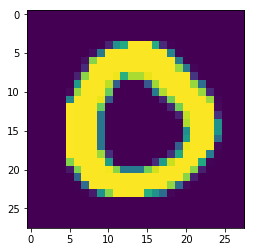

In [12]:
plt.imshow(data.loc[4].values[1:].reshape(28,28))

In [14]:
data['pixel0'].unique()

array([0], dtype=int64)

In [ ]:
svc = SVC()

In [15]:
data1 = data.loc[:1000]

y = data1['label']

X = data1.drop('label',axis = 1)

In [18]:
data2 = data.loc[-200:]

y_test = data2['label']
X_test = data2.drop('label',axis = 1)

In [19]:
%%time
svc = SVC()

svc.fit(X,y)

print(svc.score(X_test,y_test))

d:\python3.6.8\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.12033333333333333
Wall time: 58.1 s


In [25]:
y_train = data.iloc[:5000]['label']

X_train = data.iloc[:5000].drop('label',axis = 1)

In [30]:
y_test = data.iloc[-1000:]['label']

X_test = data.iloc[-1000:].drop('label',axis = 1)

In [22]:
from sklearn.decomposition import PCA

d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [26]:
pca = PCA(n_components= 0.9,whiten=True)


In [27]:
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(5000, 85)

In [31]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(1000, 85)

In [35]:
import warnings

In [36]:
warnings.filterwarnings('ignore')

In [37]:

C = [0.2,0.5,1,2,10]
tol = [1e-4,1e-3,0.01]

svc = SVC()
clf = GridSearchCV(svc,param_grid={'C':C,'tol':tol})

clf.fit(X_train_pca,y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.2, 0.5, 1, 2, 10], 'tol': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
clf.best_score_

0.943

In [38]:
clf.best_params_

{'C': 10, 'tol': 0.0001}

In [40]:
clf.score(X_test_pca,y_test)

0.952

In [43]:
svc_best = clf.best_estimator_
svc_best.score(X_test_pca,y_test)

0.952